# Assignment #5 - Jackie Woodlief & Jeff Sharpe

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, Imputer
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

/home/shelob/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Big Picture

Based on the past performance of the 2015 flight dataset (from assignment 3), we saw that the non-linear SVM's performed well on the data set; however, that was due in part because we reduced the size of our data set by quite a bit. If the Gaussian RBF with grid search can yield such good results on a small - medium size and complex data set, we can imagine that since neural networks are better at dealing with large, complex data sets, then the performance may even improve. The main reason being is that there will be more data. With such a big, complex data set, a neural network seems like the most appropriate approach.

compare 2 different airlines, maybe

# Get the Data / Info

We are using the flight data set because it is our largest data set, it's massive, with almost 6,000,000 rows and 31 columns. In the past we couldn't use the entire data set because it was too big for our computers to handle efficiently. In addition, we already know that this is a complex data set due to our past assignments involving it and visualizing it.



https://www.kaggle.com/usdot/flight-delays/data

Click on the above link, and download flights.csv, as that is the data set I used for this assignment!

In [2]:
 #Let's read in our data

flights_data = pd.read_csv("flights.csv")

/home/shelob/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train_set_throwaway, flights = train_test_split(flights_data, test_size = 0.17, random_state = 42)
del train_set_throwaway # since we don't them, we can go ahead and delete them from the memory!

In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989244 entries, 1508570 to 1367429
Data columns (total 31 columns):
YEAR                   989244 non-null int64
MONTH                  989244 non-null int64
DAY                    989244 non-null int64
DAY_OF_WEEK            989244 non-null int64
AIRLINE                989244 non-null object
FLIGHT_NUMBER          989244 non-null int64
TAIL_NUMBER            986799 non-null object
ORIGIN_AIRPORT         989244 non-null object
DESTINATION_AIRPORT    989244 non-null object
SCHEDULED_DEPARTURE    989244 non-null int64
DEPARTURE_TIME         974729 non-null float64
DEPARTURE_DELAY        974729 non-null float64
TAXI_OUT               974222 non-null float64
WHEELS_OFF             974222 non-null float64
SCHEDULED_TIME         989244 non-null float64
ELAPSED_TIME           971487 non-null float64
AIR_TIME               971487 non-null float64
DISTANCE               989244 non-null int64
WHEELS_ON              973616 non-null float64
TAXI_IN

In [5]:
flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,989244.0,989244.000000,989244.000000,989244.000000,989244.000000,989244.00000,974729.000000,974729.000000,974222.000000,974222.000000,...,989244.000000,973616.000000,971487.000000,989244.000000,989244.000000,180586.000000,180586.000000,180586.000000,180586.000000,180586.000000
mean,2015.0,6.521581,15.705901,3.924253,2171.461972,1329.54379,1335.244998,9.376492,16.075074,1357.214071,...,1493.999944,1476.876830,4.422846,0.002609,0.015341,13.449121,0.074607,18.991876,23.515284,2.972323
std,0.0,3.405019,8.783922,1.988866,1756.456337,483.62175,496.297124,37.207911,8.924512,497.906636,...,507.128619,526.259036,39.373835,0.051012,0.122905,27.929466,1.945797,49.031444,42.955290,20.579862
min,2015.0,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,-47.000000,1.000000,1.000000,...,1.000000,1.000000,-82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,4.000000,8.000000,2.000000,730.000000,917.00000,921.000000,-5.000000,11.000000,935.000000,...,1110.000000,1059.000000,-13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,7.000000,16.000000,4.000000,1689.000000,1325.00000,1330.000000,-2.000000,14.000000,1343.000000,...,1520.000000,1513.000000,-5.000000,0.000000,0.000000,2.000000,0.000000,2.000000,3.000000,0.000000
75%,2015.0,9.000000,23.000000,6.000000,3225.000000,1730.00000,1739.000000,7.000000,19.000000,1754.000000,...,1918.000000,1917.000000,8.000000,0.000000,0.000000,18.000000,0.000000,19.000000,29.000000,0.000000
max,2015.0,12.000000,31.000000,7.000000,7438.000000,2359.00000,2400.000000,1670.000000,225.000000,2400.000000,...,2359.000000,2400.000000,1665.000000,1.000000,1.000000,1101.000000,221.000000,1665.000000,1294.000000,937.000000


In [6]:
flights.head(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
1508570,2015,4,7,2,EV,4900,N759EV,FWA,DTW,1340,...,1423.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
363270,2015,1,24,6,AS,611,N413AS,LAS,SEA,1910,...,2133.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3003945,2015,7,8,3,WN,1483,N463WN,OAK,SEA,630,...,812.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2291425,2015,5,26,2,WN,193,N7745A,STL,DAL,810,...,1222.0,152.0,0,0,NaN,0.0,0.0,0.0,152.0,0.0
2973084,2015,7,6,1,UA,253,N213UA,IAH,HNL,1000,...,1316.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Let's make a copy just in case we need to refer back to the original

copy = pd.DataFrame.copy(flights)

In [8]:
copy = copy.drop("CANCELLATION_REASON", 1)
copy = copy.drop("TAIL_NUMBER", 1)
copy = copy.drop("YEAR", 1)
copy = copy.drop("DAY", 1)
copy = copy.drop("MONTH", 1)
copy = copy.drop("FLIGHT_NUMBER", 1)
copy = copy.drop("DAY_OF_WEEK", 1)
copy = copy.drop("DIVERTED", 1)
copy = copy.drop("CANCELLED", 1)
copy = copy.drop("AIR_SYSTEM_DELAY", 1)
copy = copy.drop("SECURITY_DELAY", 1)
copy = copy.drop("WHEELS_OFF", 1)
copy = copy.drop("SCHEDULED_DEPARTURE", 1)
copy = copy.drop("WEATHER_DELAY", 1)
copy = copy.drop("AIRLINE_DELAY", 1)
copy = copy.drop("WHEELS_ON", 1)
copy = copy.drop("SCHEDULED_ARRIVAL", 1)
copy = copy.drop("ARRIVAL_TIME", 1)
copy = copy.drop("DEPARTURE_TIME", 1)
copy = copy.drop("LATE_AIRCRAFT_DELAY", 1)
copy = copy.drop("ARRIVAL_DELAY", 1)
copy = copy.drop("DEPARTURE_DELAY", 1)

In [9]:
# copy = copy.reset_index(drop = True)

In [10]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989244 entries, 1508570 to 1367429
Data columns (total 9 columns):
AIRLINE                989244 non-null object
ORIGIN_AIRPORT         989244 non-null object
DESTINATION_AIRPORT    989244 non-null object
TAXI_OUT               974222 non-null float64
SCHEDULED_TIME         989244 non-null float64
ELAPSED_TIME           971487 non-null float64
AIR_TIME               971487 non-null float64
DISTANCE               989244 non-null int64
TAXI_IN                973616 non-null float64
dtypes: float64(5), int64(1), object(3)
memory usage: 75.5+ MB


In [11]:
encoder = LabelEncoder() #AIRLINE, DESTINATION_AIRPORT, ORIGIN_AIRPORT

In [12]:
airline_cat = copy["AIRLINE"]
destination_cat = copy["DESTINATION_AIRPORT"]
origin_cat = copy["ORIGIN_AIRPORT"]

In [13]:
destination_cat = destination_cat.apply(str)
origin_cat = origin_cat.apply(str)

In [14]:
# destination_cat = destination_cat.fillna('Other Dest')
# origin_cat = origin_cat.fillna('Other Org')

In [15]:
airline_cat_encoded = encoder.fit_transform(airline_cat)
destination_cat_encoded = encoder.fit_transform(destination_cat)
origin_cat_encoded = encoder.fit_transform(origin_cat)

In [16]:
copy["AIRLINE"]= airline_cat_encoded
copy["DESTINATION_AIRPORT"] = destination_cat_encoded
copy["ORIGIN_AIRPORT"] = origin_cat_encoded

In [17]:
copy.head(3)

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN
1508570,4,422,396,13.0,56.0,48.0,30.0,128,5.0
363270,1,478,580,14.0,155.0,155.0,131.0,867,10.0
3003945,13,526,580,8.0,110.0,106.0,92.0,672,6.0


In [18]:
imputer = Imputer(strategy = "median")

In [19]:
imputer.fit(copy)
X = imputer.transform(copy)
transform_copy = pd.DataFrame(X, columns = copy.columns)
transform_copy

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN
0,4.0,422.0,396.0,13.0,56.0,48.0,30.0,128.0,5.0
1,1.0,478.0,580.0,14.0,155.0,155.0,131.0,867.0,10.0
2,13.0,526.0,580.0,8.0,110.0,106.0,92.0,672.0,6.0
3,13.0,598.0,384.0,6.0,100.0,99.0,85.0,546.0,8.0
4,10.0,455.0,444.0,16.0,498.0,488.0,461.0,3904.0,11.0
5,3.0,450.0,323.0,13.0,70.0,49.0,28.0,151.0,8.0
6,10.0,455.0,606.0,13.0,137.0,120.0,100.0,787.0,7.0
7,1.0,581.0,542.0,11.0,171.0,163.0,145.0,1107.0,7.0
8,0.0,470.0,479.0,34.0,385.0,381.0,341.0,2475.0,6.0
9,5.0,251.0,80.0,9.0,249.0,222.0,204.0,1607.0,9.0


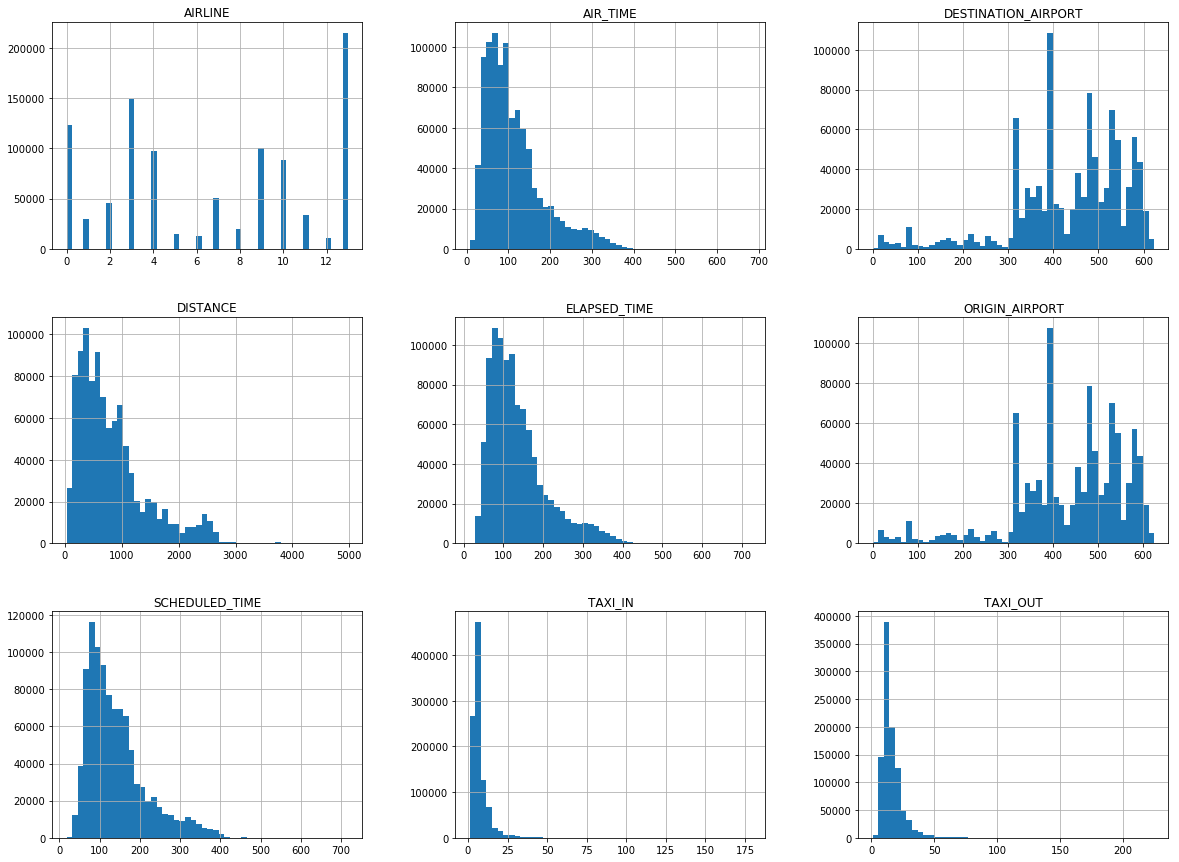

In [20]:
%matplotlib inline
transform_copy.hist(bins = 50, figsize = (20, 15))
plt.show()

In [21]:
correlation_matrix = transform_copy.corr()

In [22]:
correlation_matrix["AIRLINE"].sort_values(ascending = False)

AIRLINE                1.000000
ORIGIN_AIRPORT         0.076239
DESTINATION_AIRPORT    0.074975
TAXI_IN               -0.079668
DISTANCE              -0.082375
AIR_TIME              -0.086422
SCHEDULED_TIME        -0.105774
ELAPSED_TIME          -0.110566
TAXI_OUT              -0.170568
Name: AIRLINE, dtype: float64

In [23]:
train_set, test_set = train_test_split(transform_copy, test_size = 0.2, random_state = 42)

In [24]:
train_set.head(3)

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN
882994,3.0,480.0,520.0,15.0,221.0,217.0,198.0,1670.0,4.0
249778,9.0,326.0,454.0,15.0,52.0,55.0,34.0,140.0,6.0
30609,12.0,582.0,539.0,11.0,100.0,94.0,81.0,550.0,2.0


In [25]:
test_set.head(3)

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN
686489,13.0,526.0,495.0,8.0,200.0,206.0,193.0,1489.0,5.0
585468,0.0,263.0,214.0,17.0,255.0,245.0,210.0,1846.0,18.0
705282,9.0,455.0,331.0,16.0,227.0,208.0,187.0,1428.0,5.0


In [26]:
# Now we need to split up into test and train sets based on the airline (multi-class)

y_train = train_set["AIRLINE"]
y_test = test_set["AIRLINE"]
x_test = test_set.drop("AIRLINE", 1)
x_train = train_set.drop("AIRLINE", 1)


# We need to convert to float32 due to a warning we get when we do the dnn_clf
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train.astype('float32')

In [27]:
y_train.head(2)

882994    3.0
249778    9.0
Name: AIRLINE, dtype: float32

In [28]:
x_train.head(2)

,ORIGIN_AIRPORT,DESTINATION_AIRPORT,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN
882994,480.0,520.0,15.0,221.0,217.0,198.0,1670.0,4.0
249778,326.0,454.0,15.0,52.0,55.0,34.0,140.0,6.0


# Large-Scale Visualization

Below we will be visualizing different aspects of our data to demonstrate that it is in fact a complex data set!

In [29]:
# Before we do anything, in order to feed the various clf's our labels, we must first convert them from
# float to integers

y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

In [30]:
# x_train_ds = x_train.values
# x_test_ds = x_test.values

## Fully connected network with 2 hidden layers

This is the neural network that we start with!

Also, just to note, since we don't specify here, the activation function being used is the relu!

In [ ]:
x_train.shape

(791395, 8)

In [ ]:
# Since there are 14 different airlines, we need to change n_classes to 14, default seems to be 10
# NOTE: This will take a few minutes!!

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(x_train)
dnn_clf_hidden = tf.contrib.learn.DNNClassifier(hidden_units = [20, 20], n_classes = 23, feature_columns = feature_cols)
dnn_clf_hidden = tf.contrib.learn.SKCompat(dnn_clf_hidden)
dnn_clf_hidden.fit(x_train, y_train_int, batch_size = 50, steps = 20000) # 10,000 steps or 20,000

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7efba0ba2128>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmpku1690dx'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpku1690dx/model.ckpt.
INFO:tensorflow:loss = 378.35095, step = 1
INFO:tensorflow:global_step/sec: 101.753
INFO:tensorflow:loss = 3.454231, step = 101 (0.986 sec)
INFO:tensorflow:global_step/sec: 106.727
INFO:tensorflow:loss 

INFO:tensorflow:loss = 2.1945345, step = 7301 (1.025 sec)
INFO:tensorflow:global_step/sec: 101.132
INFO:tensorflow:loss = 2.0137637, step = 7401 (0.988 sec)
INFO:tensorflow:global_step/sec: 98.7762
INFO:tensorflow:loss = 1.9802781, step = 7501 (1.014 sec)
INFO:tensorflow:global_step/sec: 103.266
INFO:tensorflow:loss = 1.897115, step = 7601 (0.965 sec)
INFO:tensorflow:global_step/sec: 106.172
INFO:tensorflow:loss = 1.9239539, step = 7701 (0.944 sec)
INFO:tensorflow:global_step/sec: 101.731
INFO:tensorflow:loss = 2.1856525, step = 7801 (0.981 sec)
INFO:tensorflow:global_step/sec: 118.486
INFO:tensorflow:loss = 2.00684, step = 7901 (0.845 sec)
INFO:tensorflow:global_step/sec: 114.212
INFO:tensorflow:loss = 2.1366694, step = 8001 (0.875 sec)
INFO:tensorflow:global_step/sec: 106.758
INFO:tensorflow:loss = 2.1204157, step = 8101 (0.938 sec)
INFO:tensorflow:global_step/sec: 116.888
INFO:tensorflow:loss = 2.220296, step = 8201 (0.855 sec)
INFO:tensorflow:global_step/sec: 114.77
INFO:tensorflow

In [ ]:
# With a smaller data set of about 100,000 entries, accuracy is about 41%
# it goes down when more entries are added it seems

y_predict_hidden = dnn_clf_hidden.predict(x_test)
accuracy_score(y_test_int, y_predict_hidden['classes'])

In [ ]:
y_predict_hidden_train = dnn_clf_hidden.predict(x_train)

# c = tf.confusion_matrix(y_train_int, y_predict_hidden_train['classes'])

with tf.Session():
    print('Confusion Matrix: \n\n', tf.Tensor.eval(tf.confusion_matrix(y_train_int, y_predict_hidden_train['classes']),feed_dict=None, session=None))

# Testing out some Activation Functions

Our fully connected network with 2 hidden layers didn't perform to well, so let's experiment with some activation functions!

The first alternate activation function that we will try is the sigmoid, after than we will try the tanh; in both cases the accuracy decreased from the default relu function.

In [ ]:
dnn_clf_sig = tf.contrib.learn.DNNClassifier(hidden_units = [20, 20], n_classes = 14, activation_fn="sigmoid", feature_columns = feature_cols)
dnn_clf_sig = tf.contrib.learn.SKCompat(dnn_clf_sig)
dnn_clf_sig.fit(x_train, y_train_int, batch_size = 50, steps = 10000) # 10,000 steps

In [ ]:
y_predict_sig = dnn_clf_sig.predict(x_test)
accuracy_score(y_test_int, y_predict_sig['classes'])

## Now let's try out tanh activation function

In [ ]:
dnn_clf_tanh = tf.contrib.learn.DNNClassifier(hidden_units = [20, 20], n_classes = 14, activation_fn="tanh", feature_columns = feature_cols)
dnn_clf_tanh = tf.contrib.learn.SKCompat(dnn_clf_tanh)
dnn_clf_tanh.fit(x_train, y_train_int, batch_size = 50, steps = 15000) # 10,000 steps

In [ ]:
y_predict_tanh = dnn_clf_tanh.predict(x_test)
accuracy_score(y_test_int, y_predict_tanh['classes'])

# Tweaking the Model Parameters to Improve Performance

In [ ]:
x_test.info()

# Execution Phase of DNN

In [ ]:
len(y_train) # This is the amount of times we will need to iterate through later

In [ ]:
len(train_set)

In [ ]:
# n_epochs = 40
# batch_size = 50
# init=tf.global_variables_initializer()

In [ ]:
# with tf.Session() as sess:
#     init.run()
#     for epoch in range(n_epochs):
#         for iteration in range(len(train_set) // batch_size):
#             x_batch = x_train.next_batch(batch_size)
#             y_batch = y_train_int.next_batch(batch_size)
#             sess.run(training_op, feed_dict = {X: x_batch, y: y_batch})
#         acc_train = accuracy.eval(feed_dict = {X: x_batch, y: y_batch})
#         acc_test = accuracy.eval(feed_dict = {X: x_test, y: y_test_int})
#         print(epoch, "Train Accuracy:", acc_train, "Test Accuracy:", acc_test)
    
#     save_path = saver.save(sess, "./my_model_final.ckpt")